In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import math
import numpy as np

# London weather
https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

In [10]:
df = pd.read_csv('london_weather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


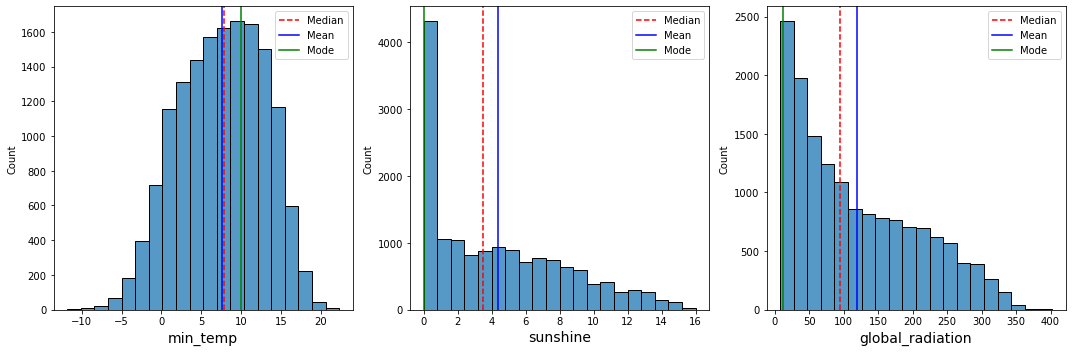

In [17]:
col=['min_temp', 'sunshine', 'global_radiation']

plt.figure(figsize=(15,5))

for i, el in enumerate(col, 1):
    plt.subplot(1,3,i)
    sns.histplot(x=df[el], bins=20)
    plt.axvline(x=df[el].median(), color='red', ls='--', label="Median") # Median = red
    plt.axvline(x=df[el].mean(), color='blue', label="Mean") # Mean = blue
    plt.axvline(x=statistics.mode(df[el]), color='green', label="Mode")
    plt.xlabel(el, size=14)
    plt.legend(loc='upper right')
plt.tight_layout()

In [18]:
bins=np.arange(-15, 30, 5)
min_temp=df.groupby(pd.cut(df['min_temp'], bins=bins)).size().reset_index(name='count')
min_temp

,min_temp,count
0,"(-15, -10]",2
1,"(-10, -5]",98
2,"(-5, 0]",1237
3,"(0, 5]",3803
4,"(5, 10]",4726
5,"(10, 15]",4366
6,"(15, 20]",1093
7,"(20, 25]",14


In [22]:
for i, el in enumerate(col, 1):
    print(f"Mean {el} = {df[el].mean()}")
    print(f"Median {el} = {df[el].median()}")
    print(f"Mode {el} = {df[el].mode()}")
    print(f"Max {el} = {df[el].max()}")
    print(f"Min {el} = {df[el].min()}")
    print(f"Standar dev {el} = {df[el].std()}")
    print(" ")

Mean min_temp = 7.559867005671808
Median min_temp = 7.8
Mode min_temp = 0    10.0
dtype: float64
Max min_temp = 22.3
Min min_temp = -11.8
Standar dev min_temp = 5.32675580728825
 
Mean sunshine = 4.350237924515966
Median sunshine = 3.5
Mode sunshine = 0    0.0
dtype: float64
Max sunshine = 16.0
Min sunshine = 0.0
Standar dev sunshine = 4.028339404679507
 
Mean global_radiation = 118.75695078971414
Median global_radiation = 95.0
Mode global_radiation = 0    12.0
dtype: float64
Max global_radiation = 402.0
Min global_radiation = 8.0
Standar dev global_radiation = 88.89827186362803
 


<ipython-input-40-fe2121188bd2>:15: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


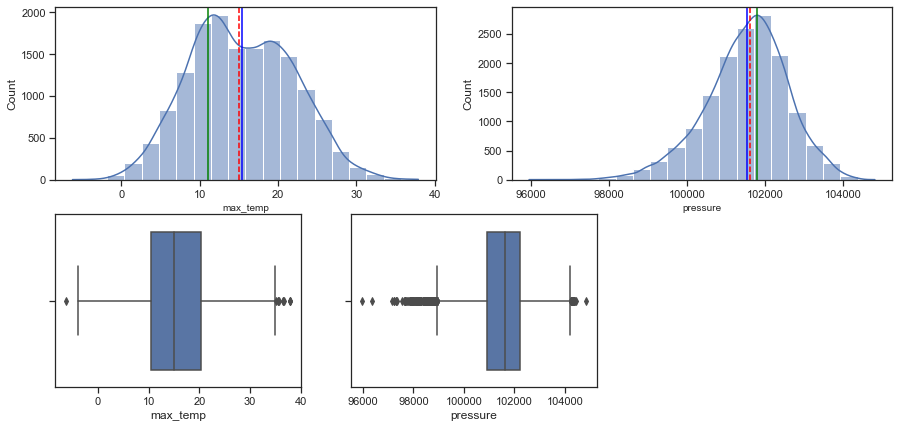

In [40]:
col=['max_temp', 'pressure']

plt.figure(figsize=(15,7))

for i, el in enumerate(col, 1):
    plt.subplot(2,2,i)
    sns.histplot(x=df[el], bins=20, kde=True)
    plt.axvline(x=df[el].median(), color='red', ls='--') # Median = red
    plt.axvline(x=df[el].mean(), color='blue') # Mean = blue
    plt.axvline(x=statistics.mode(df[el]), color='green')
    plt.xlabel(el, size=10)
    plt.subplot(2,3,i+3)
    sns.boxplot(x=df[el])

plt.tight_layout()

In [42]:
for i, el in enumerate(col, 1):
    print(f"Mean {el} = {df[el].mean()}")
    print(f"Median {el} = {df[el].median()}")
    print(f"Mode {el} = {df[el].mode()}")
    print(f"Max {el} = {df[el].max()}")
    print(f"Min {el} = {df[el].min()}")
    print(f"Standar dev {el} = {df[el].std()}")
    print(" ")

Mean max_temp = 15.388777306814523
Median max_temp = 15.0
Mode max_temp = 0    11.1
dtype: float64
Max max_temp = 37.9
Min max_temp = -6.2
Standar dev max_temp = 6.554753578982714
 
Mean pressure = 101536.6055943144
Median pressure = 101620.0
Mode pressure = 0    101790.0
dtype: float64
Max pressure = 104820.0
Min pressure = 95960.0
Standar dev pressure = 1049.7226043657072
 


In [44]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


<Figure size 1080x504 with 0 Axes>

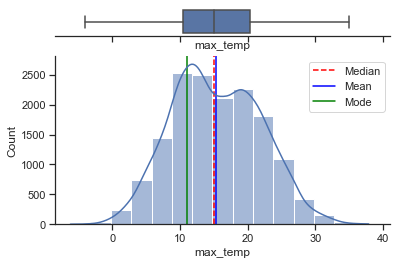

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

col='max_temp'
plt.figure(figsize=(15,7))
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df[col], showfliers=False, ax=ax_box)
plt.axvline(x=df[col].median(), color='red', ls='--', label="Median") # Median = red
plt.axvline(x=df[col].mean(), color='blue', label="Mean") # Mean = blue
plt.axvline(x=statistics.mode(df[col]), color='green', label="Mode")
sns.histplot(x=df[col], ax=ax_hist, kde=True, binwidth=3)
plt.legend(loc='upper right')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

<Figure size 1080x504 with 0 Axes>

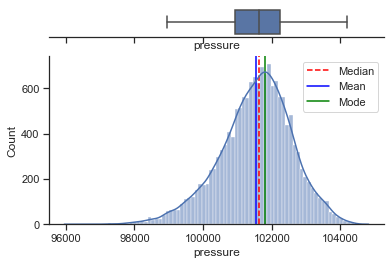

In [47]:
col='pressure'
plt.figure(figsize=(15,7))
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df[col], showfliers=False, ax=ax_box)
plt.axvline(x=df[col].median(), color='red', ls='--', label="Median") # Median = red
plt.axvline(x=df[col].mean(), color='blue', label="Mean") # Mean = blue
plt.axvline(x=statistics.mode(df[col]), color='green', label="Mode")
sns.histplot(x=df[col], ax=ax_hist, kde=True)
plt.legend(loc='upper right')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

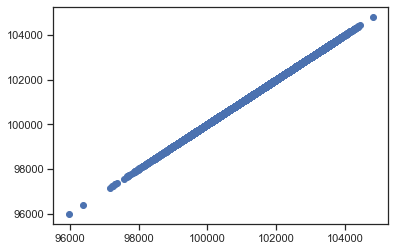

In [28]:
plt.scatter(df['pressure'], df['pressure'])

## Hypothesis testing

### Statement 2

In [62]:
sample_max_temp = df['max_temp'].sample(250)

<AxesSubplot:ylabel='Frequency'>

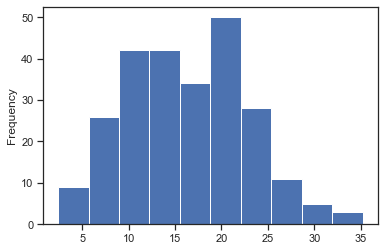

In [63]:
sample_max_temp.plot(kind='hist')

In [64]:
sample_max_temp.mean(), statistics.stdev(sample_max_temp), len(sample_max_temp)

(16.318799999999996, 6.382544481335394, 250)

- H0: population mean <= 15.39
- Ha: population mean > 15.39

In [65]:
miu = df['max_temp'].mean()
xbar = sample_max_temp.mean()
deviasi = statistics.stdev(sample_max_temp)
n = len(sample_max_temp)

z = (xbar - miu) / (deviasi/math.sqrt(n))
z

2.3039322285261377

our z score is not on rejecting region (z > 1.645)

- We failed reject the Null Hypothesis

### Statement 1

<AxesSubplot:ylabel='Frequency'>

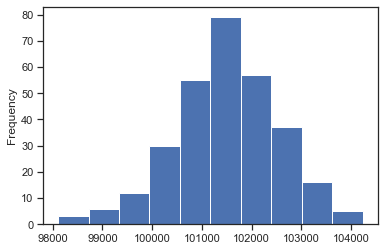

In [59]:
sample_pressure=df['pressure'].sample(300)
sample_pressure.plot(kind='hist')

In [60]:
sample_pressure.mean(), statistics.stdev(sample_pressure), len(sample_pressure)

(101493.23333333334, 1048.24836162415, 300)

In [61]:
miu = df['pressure'].mean()
xbar = sample_pressure.mean()
deviasi = statistics.stdev(sample_pressure)
n = len(sample_pressure)

z = (xbar-miu)/(deviasi/math.sqrt(n))
z

-0.7166522973806154

our z score is not on rejecting region (-1.96 < z < 1.96)
- **we failed to reject the null hypothesis**

### Statement 3

<AxesSubplot:ylabel='Frequency'>

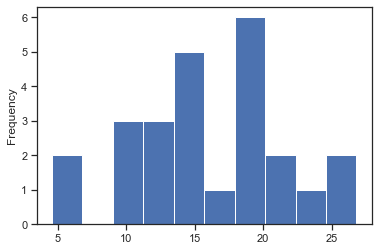

In [66]:
sample_max_temp2 = df['max_temp'].sample(25)
sample_max_temp2.plot(kind='hist')

In [67]:
sample_max_temp2.mean(), statistics.stdev(sample_max_temp2), len(sample_max_temp2)

(16.076, 5.642862748640977, 25)

In [68]:
df['max_temp'].std()

6.554753578982714

In [71]:
n=len(sample_max_temp2)
s=statistics.stdev(sample_max_temp2)
sigma=df['max_temp'].std()

chisquare = ((n-1)*s**2) / sigma**2
chisquare

17.78678588430414

### Statement 4

<AxesSubplot:ylabel='Frequency'>

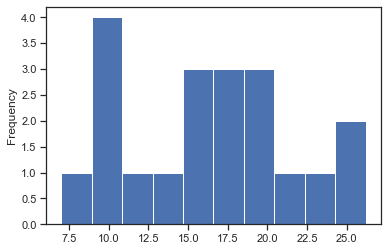

In [76]:
sample_max_temp3 = df['max_temp'].sample(20)
sample_max_temp3.plot(kind='hist')

In [77]:
sample_max_temp3.mean(), statistics.stdev(sample_max_temp3), len(sample_max_temp3)

(16.380000000000003, 5.472861274170559, 20)

In [ ]:
n=len(sample_max_temp2)
s=statistics.stdev(sample_max_temp2)
sigma=df['max_temp'].std()

chisquare = ((n-1)*s**2) / sigma**2
chisquare

17.78678588430414

In [78]:
B = 16.38 - (2.093 * 5.47/math.sqrt(20))
A = 16.38 + (2.093 * 5.47/math.sqrt(20))
B, A

(13.819990618531838, 18.940009381468162)

In [80]:
2.093 * 5.47/math.sqrt(20)

2.5600093814681615